In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataNormal = pd.read_csv('AirPassengers.csv')
dataNormal

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [3]:
data = pd.read_csv('AirPassengers.csv', 
                      index_col='Month', 
                      parse_dates=True, 
                      dtype='float')
data

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


In [4]:
ts = data['#Passengers'] 
ts

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
1949-06-01    135.0
1949-07-01    148.0
1949-08-01    148.0
1949-09-01    136.0
1949-10-01    119.0
1949-11-01    104.0
1949-12-01    118.0
1950-01-01    115.0
1950-02-01    126.0
1950-03-01    141.0
1950-04-01    135.0
1950-05-01    125.0
1950-06-01    149.0
1950-07-01    170.0
1950-08-01    170.0
1950-09-01    158.0
1950-10-01    133.0
1950-11-01    114.0
1950-12-01    140.0
1951-01-01    145.0
1951-02-01    150.0
1951-03-01    178.0
1951-04-01    163.0
1951-05-01    172.0
1951-06-01    178.0
              ...  
1958-07-01    491.0
1958-08-01    505.0
1958-09-01    404.0
1958-10-01    359.0
1958-11-01    310.0
1958-12-01    337.0
1959-01-01    360.0
1959-02-01    342.0
1959-03-01    406.0
1959-04-01    396.0
1959-05-01    420.0
1959-06-01    472.0
1959-07-01    548.0
1959-08-01    559.0
1959-09-01    463.0
1959-10-01    407.0
1959-11-01    362.0
1959-12-01    405.0
1960-01-01    

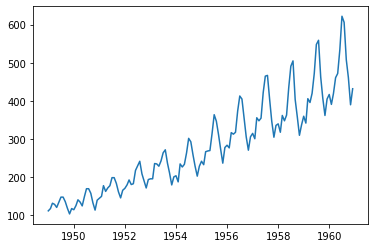

In [5]:
plt.plot(ts)

In [6]:
ts[datetime(1949,1,1)]

112.0

In [7]:
ts['1949']

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
1949-06-01    135.0
1949-07-01    148.0
1949-08-01    148.0
1949-09-01    136.0
1949-10-01    119.0
1949-11-01    104.0
1949-12-01    118.0
Name: #Passengers, dtype: float64

In [8]:
ts.shift()

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
1949-06-01    121.0
1949-07-01    135.0
1949-08-01    148.0
1949-09-01    148.0
1949-10-01    136.0
1949-11-01    119.0
1949-12-01    104.0
1950-01-01    118.0
1950-02-01    115.0
1950-03-01    126.0
1950-04-01    141.0
1950-05-01    135.0
1950-06-01    125.0
1950-07-01    149.0
1950-08-01    170.0
1950-09-01    170.0
1950-10-01    158.0
1950-11-01    133.0
1950-12-01    114.0
1951-01-01    140.0
1951-02-01    145.0
1951-03-01    150.0
1951-04-01    178.0
1951-05-01    163.0
1951-06-01    172.0
              ...  
1958-07-01    435.0
1958-08-01    491.0
1958-09-01    505.0
1958-10-01    404.0
1958-11-01    359.0
1958-12-01    310.0
1959-01-01    337.0
1959-02-01    360.0
1959-03-01    342.0
1959-04-01    406.0
1959-05-01    396.0
1959-06-01    420.0
1959-07-01    472.0
1959-08-01    548.0
1959-09-01    559.0
1959-10-01    463.0
1959-11-01    407.0
1959-12-01    362.0
1960-01-01    

In [9]:
# 差分
ts.diff()

Month
1949-01-01      NaN
1949-02-01      6.0
1949-03-01     14.0
1949-04-01     -3.0
1949-05-01     -8.0
1949-06-01     14.0
1949-07-01     13.0
1949-08-01      0.0
1949-09-01    -12.0
1949-10-01    -17.0
1949-11-01    -15.0
1949-12-01     14.0
1950-01-01     -3.0
1950-02-01     11.0
1950-03-01     15.0
1950-04-01     -6.0
1950-05-01    -10.0
1950-06-01     24.0
1950-07-01     21.0
1950-08-01      0.0
1950-09-01    -12.0
1950-10-01    -25.0
1950-11-01    -19.0
1950-12-01     26.0
1951-01-01      5.0
1951-02-01      5.0
1951-03-01     28.0
1951-04-01    -15.0
1951-05-01      9.0
1951-06-01      6.0
              ...  
1958-07-01     56.0
1958-08-01     14.0
1958-09-01   -101.0
1958-10-01    -45.0
1958-11-01    -49.0
1958-12-01     27.0
1959-01-01     23.0
1959-02-01    -18.0
1959-03-01     64.0
1959-04-01    -10.0
1959-05-01     24.0
1959-06-01     52.0
1959-07-01     76.0
1959-08-01     11.0
1959-09-01    -96.0
1959-10-01    -56.0
1959-11-01    -45.0
1959-12-01     43.0
1960-01-01    

In [10]:
# 対数差分系列
logDiff = np.log(ts) - np.log(ts.shift())
logDiff.dropna()

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
1949-09-01   -0.084557
1949-10-01   -0.133531
1949-11-01   -0.134733
1949-12-01    0.126294
1950-01-01   -0.025752
1950-02-01    0.091350
1950-03-01    0.112478
1950-04-01   -0.043485
1950-05-01   -0.076961
1950-06-01    0.175633
1950-07-01    0.131852
1950-08-01    0.000000
1950-09-01   -0.073203
1950-10-01   -0.172246
1950-11-01   -0.154151
1950-12-01    0.205444
1951-01-01    0.035091
1951-02-01    0.033902
1951-03-01    0.171148
1951-04-01   -0.088033
1951-05-01    0.053744
1951-06-01    0.034289
1951-07-01    0.111521
                ...   
1958-07-01    0.121098
1958-08-01    0.028114
1958-09-01   -0.223144
1958-10-01   -0.118092
1958-11-01   -0.146750
1958-12-01    0.083511
1959-01-01    0.066021
1959-02-01   -0.051293
1959-03-01    0.171542
1959-04-01   -0.024939
1959-05-01    0.058841
1959-06-01    0.116724
1959-

In [11]:
# 自己相関
ts_acf = sm.tsa.stattools.acf(ts, nlags=40)
ts_acf

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

In [12]:
# 偏自己相関
ts_pacf = sm.tsa.stattools.pacf(ts, nlags=40, method='ols')
ts_pacf

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883,  0.3859958 ,  0.24203808, -0.04912986,
       -0.19599778, -0.15443575,  0.04484465,  0.18371541, -0.0906113 ,
       -0.06202938,  0.34827092,  0.09899499, -0.08396793,  0.36328898,
       -0.17956662,  0.15839435,  0.06376775, -0.27503705,  0.2707607 ,
        0.32002003])

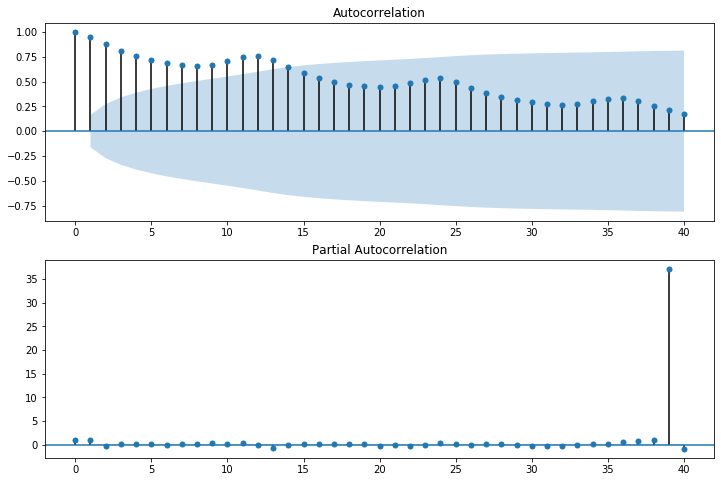

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts, lags=40, ax=ax2)

In [14]:
# 差分
diff = ts - ts.shift()
diff = diff.dropna()
diff

Month
1949-02-01      6.0
1949-03-01     14.0
1949-04-01     -3.0
1949-05-01     -8.0
1949-06-01     14.0
1949-07-01     13.0
1949-08-01      0.0
1949-09-01    -12.0
1949-10-01    -17.0
1949-11-01    -15.0
1949-12-01     14.0
1950-01-01     -3.0
1950-02-01     11.0
1950-03-01     15.0
1950-04-01     -6.0
1950-05-01    -10.0
1950-06-01     24.0
1950-07-01     21.0
1950-08-01      0.0
1950-09-01    -12.0
1950-10-01    -25.0
1950-11-01    -19.0
1950-12-01     26.0
1951-01-01      5.0
1951-02-01      5.0
1951-03-01     28.0
1951-04-01    -15.0
1951-05-01      9.0
1951-06-01      6.0
1951-07-01     21.0
              ...  
1958-07-01     56.0
1958-08-01     14.0
1958-09-01   -101.0
1958-10-01    -45.0
1958-11-01    -49.0
1958-12-01     27.0
1959-01-01     23.0
1959-02-01    -18.0
1959-03-01     64.0
1959-04-01    -10.0
1959-05-01     24.0
1959-06-01     52.0
1959-07-01     76.0
1959-08-01     11.0
1959-09-01    -96.0
1959-10-01    -56.0
1959-11-01    -45.0
1959-12-01     43.0
1960-01-01    

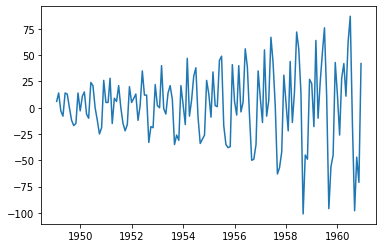

In [15]:
# 差分系列のグラフ
plt.plot(diff)

In [16]:
# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')
resDiff

{'aic':              0            1            2
 0          NaN  1397.257791  1397.093436
 1  1401.852641  1412.615224  1385.496795
 2  1396.587654  1378.338024  1353.175676
 3  1395.021214  1379.614000  1351.138709
 4  1388.216680  1379.616584  1373.560615, 'aic_min_order': (3, 2)}

In [17]:
# P-3, q=2 が最善となったので、それをモデル化
ARIMA_3_1_2 = ARIMA(ts, order=(3, 1, 2)).fit(dist=False)
ARIMA_3_1_2.params

const                  2.673499
ar.L1.D.#Passengers    0.261993
ar.L2.D.#Passengers    0.367839
ar.L3.D.#Passengers   -0.363490
ma.L1.D.#Passengers   -0.075025
ma.L2.D.#Passengers   -0.924833
dtype: float64

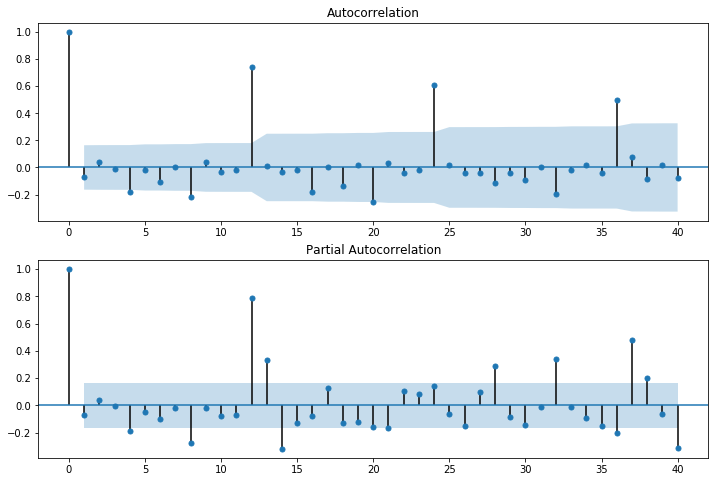

In [18]:
# 残差のチェック
resid = ARIMA_3_1_2.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [19]:
# SARIMAモデルを「決め打ち」で推定する
SARIMA_3_1_2_111 = sm.tsa.SARIMAX(ts, order=(3,1,2), seasonal_order=(1,1,1,12)).fit(method='bfgs', maxiter=300)
print(SARIMA_3_1_2_111.summary())

         Current function value: 3.493921
         Iterations: 26
         Function evaluations: 131
         Gradient evaluations: 119
                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(3, 1, 2)x(1, 1, 1, 12)   Log Likelihood                -503.125
Date:                            Fri, 16 Aug 2019   AIC                           1022.249
Time:                                    22:25:16   BIC                           1045.251
Sample:                                01-01-1949   HQIC                          1031.596
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

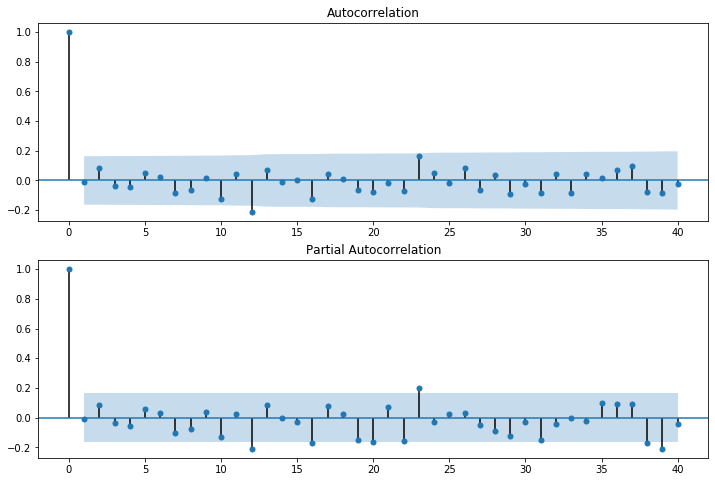

In [20]:
# 残差のチェック
residSARIMA = SARIMA_3_1_2_111.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

In [21]:
# 予測
pred = SARIMA_3_1_2_111.predict('1960-01-01', '1961-12-01')
print(pred)

1960-01-01    414.815304
1960-02-01    396.631971
1960-03-01    450.005162
1960-04-01    417.258231
1960-05-01    468.301763
1960-06-01    523.930412
1960-07-01    605.768841
1960-08-01    622.081027
1960-09-01    512.170041
1960-10-01    451.727670
1960-11-01    411.509347
1960-12-01    437.179792
1961-01-01    449.522244
1961-02-01    423.913528
1961-03-01    460.668079
1961-04-01    497.394015
1961-05-01    510.668739
1961-06-01    569.300024
1961-07-01    657.130050
1961-08-01    643.085605
1961-09-01    548.493006
1961-10-01    498.553368
1961-11-01    430.465768
1961-12-01    474.340648
Freq: MS, dtype: float64


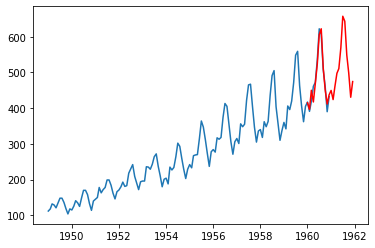

In [22]:
# 実データと予測結果の図示
plt.plot(ts)
plt.plot(pred, "r")

In [23]:
# 総当たりで、AICが最小となるSARIMAの次数を探す
max_p = 3
max_q = 3
max_d = 1
max_sp = 1
max_sq = 1
max_sd = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])
pattern

192

In [24]:
# 自動SARIMA選択
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,12), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit(method='bfgs', maxiter=300, disp=False)
                        modelSelection.ix[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.ix[num]["aic"] = sarima.aic
                        num = num + 1

modelSelection

,model,aic
0,"order=(1,0,0), season=(0,0,0)",1415.91
1,"order=(1,0,0), season=(0,0,1)",1205.39
2,"order=(1,0,0), season=(0,1,0)",1029.98
3,"order=(1,0,0), season=(0,1,1)",944.385
4,"order=(1,0,0), season=(1,0,0)",1017.32
5,"order=(1,0,0), season=(1,0,1)",1007.03
6,"order=(1,0,0), season=(1,1,0)",944.044
7,"order=(1,0,0), season=(1,1,1)",945.44
8,"order=(1,0,1), season=(0,0,0)",1390.45
9,"order=(1,0,1), season=(0,0,1)",1192.29


In [25]:
# AIC最小モデル
modelSelection[modelSelection.aic == min(modelSelection.aic)]

,model,aic
187,"order=(3,1,3), season=(0,1,1)",898.105


In [26]:
bestSARIMA = sm.tsa.SARIMAX(ts, order=(3,1,3), seasonal_order=(0,1,1,12), enforce_stationarity = False, enforce_invertibility = False).fit()

In [27]:
bestSARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(3, 1, 3)x(0, 1, 1, 12)   Log Likelihood                -441.052
Date:                            Fri, 16 Aug 2019   AIC                            898.105
Time:                                    22:39:09   BIC                            920.064
Sample:                                01-01-1949   HQIC                           907.018
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2231      0.097     -2.302      0.021      -0.413      -0.033
ar.L2         -0.1642      0.108     -1.515      0.130      -0.377       0.048
ar.L3          0.7244      0.094      7.704      0.000       0.540       0.909
ma.L1         -0.0837    119.522     -0.001      0.999    -234.342     234.175
ma.L2          0.1221    149.666      0.001      0.999    -293.217     293.461
ma.L3         -0.9797    261.367     -0.004      0.997    -513.250     511.291
ma.S.L12      -0.1583      0.118     -1.337      0.181      -0.390       0.074
sigma2       119.6719   3.19e+04      0.004      0.997   -6.25e+04    6.27e+04
===================================================================================
Ljung-Box (Q):                       36.68   Jarque-Bera (JB):                 4.39
Prob(Q):                              0.62   Prob(JB):                         0.11
Heteroskedasticity (H):               1.87   Skew:                             0.16
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

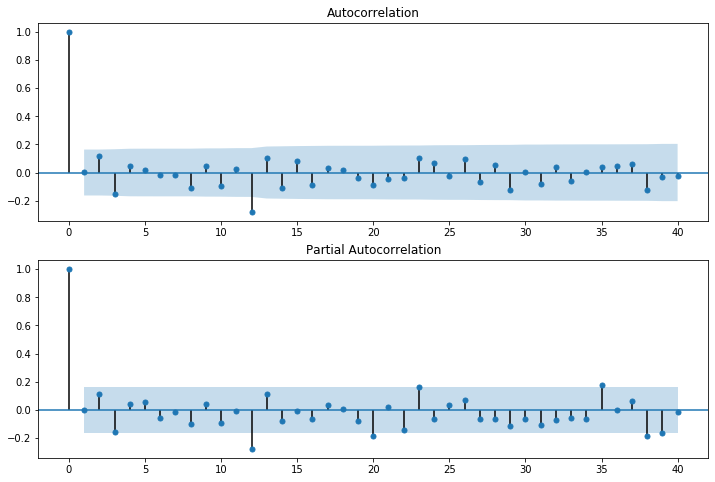

In [28]:
# 残差のチェック
residSARIMA = bestSARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

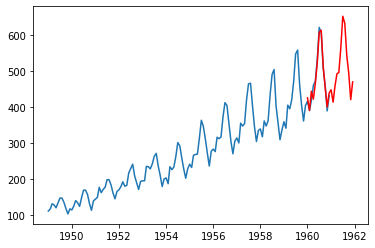

In [29]:
# 予測
bestPred = bestSARIMA.predict('1960-01-01', '1961-12-01')
# 実データと予測結果の図示
plt.plot(ts)
plt.plot(bestPred, "r")